## Analyzing State-by-State Changes In Earthquake Frequency

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Load and clean up data

The data was obtained from USGS here: http://earthquake.usgs.gov/earthquakes/search/. It was then run through a PostGIS database to determine the location of the epicenters by state, since USGS does provide specific state locations in its data.

In [2]:
all_quakes = pd.DataFrame.from_csv("earthquake_states.csv", index_col=None, parse_dates=["time", "updated"])

Some earthquakes within the U.S. bounding box don't have epicenters outside any state (e.g., the ocean).

In [3]:
us_quakes = all_quakes.dropna(subset=["state"])

In [4]:
state_counts = pd.DataFrame(us_quakes.state.value_counts())

In [5]:
state_counts.columns = ["total_number_of_earthquakes"]

In [6]:
state_counts

,total_number_of_earthquakes
California,18108
Alaska,12326
Nevada,1975
Idaho,1231
Washington,973
Oklahoma,899
Montana,726
Wyoming,714
Hawaii,640
Utah,559


## Charting Earthquake Activity Over Time, By State

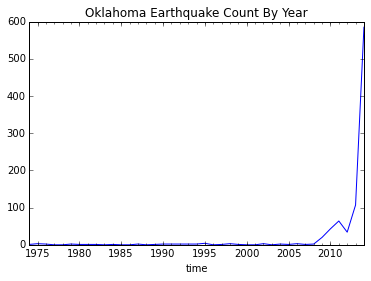

In [7]:
ax = us_quakes[us_quakes["state"] == "Oklahoma"].set_index("time")["id"].resample("A", how="count").plot()
ax.set_title("Oklahoma Earthquake Count By Year")
pass

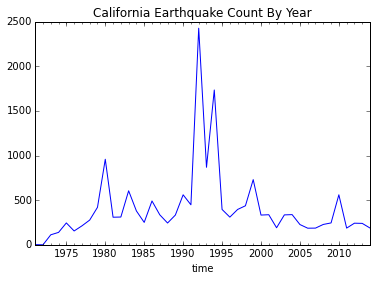

In [8]:
ax = us_quakes[us_quakes["state"] == "California"].set_index("time")["id"].resample("A", how="count").plot()
ax.set_title("California Earthquake Count By Year")
pass

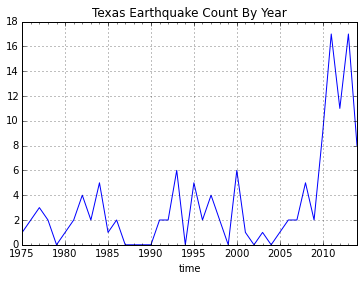

In [9]:
ax = us_quakes[us_quakes["state"] == "Texas"].set_index("time")["id"].resample("A", how="count").plot()
ax.set_title("Texas Earthquake Count By Year")
pass

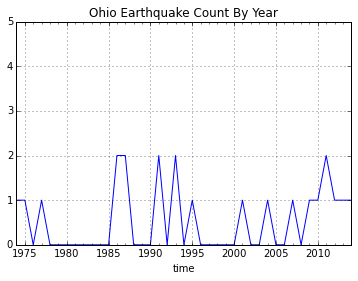

In [10]:
ax = us_quakes[us_quakes["state"] == "Ohio"].set_index("time")["id"].resample("A", how="count").plot(color="b")
ax.set_title("Ohio Earthquake Count By Year")
ax.set_ylim([0,5])
pass

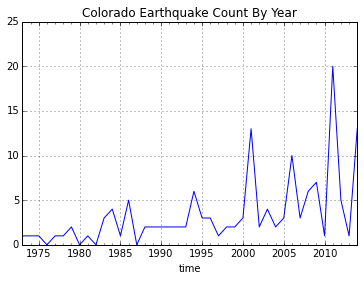

In [11]:
ax = us_quakes[us_quakes["state"] == "Colorado"].set_index("time")["id"].resample("A", how="count").plot()
ax.set_title("Colorado Earthquake Count By Year")
ax.set_ylim([0,25])
pass

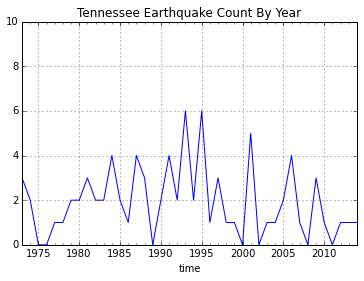

In [12]:
ax = us_quakes[us_quakes["state"] == "Tennessee"].set_index("time")["id"].resample("A", how="count").plot()
ax.set_title("Tennessee Earthquake Count By Year")
ax.set_ylim([0,10])
pass

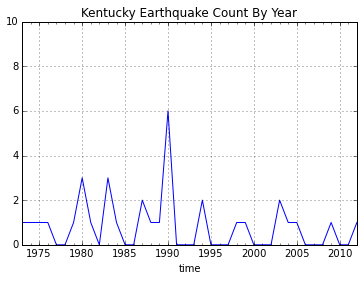

In [13]:
ax = us_quakes[us_quakes["state"] == "Kentucky"].set_index("time")["id"].resample("A", how="count").plot()
ax.set_title("Kentucky Earthquake Count By Year")
ax.set_ylim([0,10])
pass

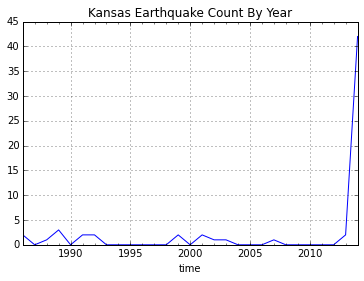

In [14]:
ax = us_quakes[us_quakes["state"] == "Kansas"].set_index("time")["id"].resample("A", how="count").plot()
ax.set_title("Kansas Earthquake Count By Year")
pass

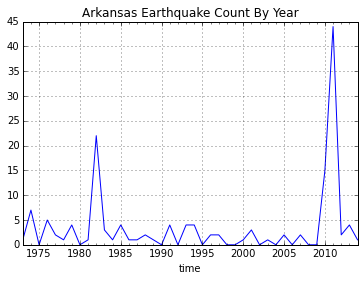

In [15]:
ax = us_quakes[us_quakes["state"] == "Arkansas"].set_index("time")["id"].resample("A", how="count").plot()
ax.set_title("Arkansas Earthquake Count By Year")
pass

## Calculating Percentage Change Decade Over Decade

The most recent complete year of earthquakes is 2014. Below, we compare 2005-2014 to the prior decade, 1995-2004.

In [17]:
def quake_percentage_change(state):
    by_year = pd.DataFrame(us_quakes[us_quakes["state"] == state].set_index("time")["id"].resample("AS", how="count"))
    by_year["start"] = by_year.index
    by_year["year"] = by_year["start"].apply(lambda x: x.year)
    decade_05_14 = by_year[(by_year["year"] >= 2005) & (by_year["year"] <= 2014)]
    total_05_14 = decade_05_14["id"].sum()
    decade_95_04 = by_year[(by_year["year"] >= 1995) & (by_year["year"] <= 2004)]
    total_95_04 = decade_95_04["id"].sum()
    if total_95_04 != 0:
        pct = round(100.0 * (total_05_14 - total_95_04) / total_95_04, 2)
    else:
        pct = None
    return pct, total_05_14, total_95_04

In [19]:
state_counts["name"] = state_counts.index

In [20]:
state_counts["percentage_change"], state_counts["total_05-14"], state_counts["total_95-04"] =\
    zip(*state_counts["name"].apply(lambda x: quake_percentage_change(x)))

The overall percentage change in the United States decade-over-decade:

In [22]:
round(100.0 * (state_counts["total_05-14"].sum() - state_counts["total_95-04"].sum()) / state_counts["total_95-04"].sum(), 2)

-6.56

States with at least 5 earthquakes from 1995-2004 (sorted by percentage change decade-over-decade):

In [23]:
state_counts[state_counts["total_95-04"] >= 5].sort("percentage_change", ascending=False)

,total_number_of_earthquakes,name,percentage_change,total_05-14,total_95-04
Oklahoma,899,Oklahoma,6042.86,860,14
Arkansas,147,Arkansas,677.78,70,9
Kansas,61,Kansas,650,45,6
Texas,130,Texas,252.38,74,21
Hawaii,640,Hawaii,233.33,240,72
Illinois,61,Illinois,200,15,5
Arizona,174,Arizona,195.45,65,22
Virginia,28,Virginia,160,13,5
Colorado,143,Colorado,97.14,69,35
New Mexico,165,New Mexico,46.15,57,39
